### Classic Control agent
#### CartPole DQN . 
1. EpsGreedy Policy LinnearAllined

In [7]:
import gym
import numpy as np 

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from rl.callbacks import Callback, FileLogger
from rl.agents.dqn import DQNAgent
from rl.agents.ddpg import DDPGAgent
from rl.policy import BoltzmannGumbelQPolicy , LinearAnnealedPolicy , EpsGreedyQPolicy
from rl.memory import SequentialMemory

In [8]:
env = gym.make('CartPole-v0')
nb_actions = env.action_space.n
nb_actions

2

In [9]:
# Next, we build a neural network model
model2 = Sequential()
model2.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model2.add(Dense(300, activation= 'tanh')) # layer 1: 300 cells with tanh activation function 
model2.add(Dense(nb_actions))
model2.add(Dense(600, activation= 'sigmoid')) #layer 2 : 600 cells with sigmoid activation function 
model2.add(Dense(nb_actions))
model2.add(Dense(600, activation= 'sigmoid')) #layer 3 : 600 cells with sigmoid activation function  
model2.add(Dense(nb_actions))
model2.add(Dense(600, activation= 'sigmoid')) #layer 4 : 600 cells with sigmoid activation function  
model2.add(Dense(nb_actions))
model2.add(Dense(300, activation= 'tanh')) #layer 5 : 300 cells with tanh activation function  
model2.add(Dense(nb_actions))
model2.add(Dense(300, activation= 'sigmoid')) #layer 6 : 300 cells with sigmoid activation function  
model2.add(Dense(nb_actions))
model2.add(Activation('softmax')) # one layer of 1 unit with sigmoid activation function
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               1500      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 602       
_________________________________________________________________
dense_15 (Dense)             (None, 600)               1800      
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 1202      
_________________________________________________________________
dense_17 (Dense)             (None, 600)               1800      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 1202      
__________

In [10]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05,
                              nb_steps=1000000)

memory = SequentialMemory(limit=1000000, window_length=1)
dqn2 = DQNAgent(model=model2, nb_actions=nb_actions, memory=memory, nb_steps_warmup=50,
              target_model_update=1e-2, policy=policy)
dqn2.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])

In [11]:
import os.path
file_path = 'dqn_cartpole_weights.h5f'
if os.path.exists(file_path):
    dqn2.load_weights(file_path)
    
class Saver(Callback):
    def on_episode_end(self, episode, logs={}):
        print('episode callback')
        if episode % 1 == 0:
            self.model.save_weights('dqn_cartpole_weights.h5f', overwrite=True)

In [58]:
logs = FileLogger('cartpole.csv', interval = 1)
s = Saver()
dqn2.fit(env, nb_steps=1000000,callbacks=[s,logs], visualize=True, verbose=2)
#dqn2.test(env, nb_episodes=10, visualize=True)

Training for 1000000 steps ...
episode callback
     14/1000000: episode: 1, duration: 0.227s, episode steps: 14, steps per second: 62, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.714 [0.000, 1.000], mean observation: -0.101 [-1.973, 1.166], loss: --, mean_absolute_error: --, acc: --, mean_q: --, mean_eps: --
episode callback
     90/1000000: episode: 2, duration: 1.276s, episode steps: 76, steps per second: 60, episode reward: 76.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.447 [0.000, 1.000], mean observation: 0.004 [-1.584, 2.088], loss: 0.490186, mean_absolute_error: 0.741978, acc: 0.500000, mean_q: 0.511641, mean_eps: 0.999937
episode callback
    113/1000000: episode: 3, duration: 0.384s, episode steps: 23, steps per second: 60, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.652 [0.000, 1.000], mean observation: -0.044 [-2.229, 1.370], loss: 0.471869, mean_absolute_error: 0.734144, acc: 0.466033, mean_q: 0.517468,

episode callback
    606/1000000: episode: 26, duration: 0.296s, episode steps: 17, steps per second: 57, episode reward: 17.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.588 [0.000, 1.000], mean observation: -0.092 [-1.388, 0.643], loss: 0.477899, mean_absolute_error: 0.734838, acc: 0.527574, mean_q: 0.524785, mean_eps: 0.999463
episode callback
    626/1000000: episode: 27, duration: 0.330s, episode steps: 20, steps per second: 61, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.094 [-0.744, 1.178], loss: 0.489955, mean_absolute_error: 0.742735, acc: 0.485938, mean_q: 0.532497, mean_eps: 0.999446
episode callback
    651/1000000: episode: 28, duration: 0.421s, episode steps: 25, steps per second: 59, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.560 [0.000, 1.000], mean observation: -0.062 [-1.571, 0.814], loss: 0.485832, mean_absolute_error: 0.739521, acc: 0.500000, mean_q: 0.50936

   1107/1000000: episode: 50, duration: 0.189s, episode steps: 10, steps per second: 53, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.121 [-2.506, 1.592], loss: 0.486945, mean_absolute_error: 0.740510, acc: 0.462500, mean_q: 0.516939, mean_eps: 0.999009
episode callback
   1122/1000000: episode: 51, duration: 0.264s, episode steps: 15, steps per second: 57, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.733 [0.000, 1.000], mean observation: -0.072 [-2.235, 1.412], loss: 0.471256, mean_absolute_error: 0.732762, acc: 0.470833, mean_q: 0.503369, mean_eps: 0.998997
episode callback
   1142/1000000: episode: 52, duration: 0.348s, episode steps: 20, steps per second: 58, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.550 [0.000, 1.000], mean observation: -0.067 [-1.474, 0.838], loss: 0.487570, mean_absolute_error: 0.740619, acc: 0.487500, mean_q: 0.509039, mean_eps: 0.9

episode callback
   1701/1000000: episode: 75, duration: 0.680s, episode steps: 40, steps per second: 59, episode reward: 40.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.450 [0.000, 1.000], mean observation: -0.001 [-1.382, 1.727], loss: 0.480805, mean_absolute_error: 0.738173, acc: 0.488281, mean_q: 0.505293, mean_eps: 0.998488
episode callback
   1728/1000000: episode: 76, duration: 0.449s, episode steps: 27, steps per second: 60, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.407 [0.000, 1.000], mean observation: 0.084 [-1.018, 1.968], loss: 0.485687, mean_absolute_error: 0.739342, acc: 0.512731, mean_q: 0.524415, mean_eps: 0.998457
episode callback
   1755/1000000: episode: 77, duration: 0.449s, episode steps: 27, steps per second: 60, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.519 [0.000, 1.000], mean observation: 0.123 [-0.588, 0.951], loss: 0.490851, mean_absolute_error: 0.742631, acc: 0.488426, mean_q: 0.522565

episode callback
   2241/1000000: episode: 100, duration: 0.667s, episode steps: 40, steps per second: 60, episode reward: 40.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.575 [0.000, 1.000], mean observation: 0.036 [-1.825, 1.554], loss: 0.477938, mean_absolute_error: 0.735953, acc: 0.489844, mean_q: 0.513212, mean_eps: 0.998002
episode callback
   2284/1000000: episode: 101, duration: 0.734s, episode steps: 43, steps per second: 59, episode reward: 43.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.419 [0.000, 1.000], mean observation: -0.021 [-1.584, 1.946], loss: 0.474558, mean_absolute_error: 0.733676, acc: 0.507267, mean_q: 0.516315, mean_eps: 0.997964
episode callback
   2298/1000000: episode: 102, duration: 0.248s, episode steps: 14, steps per second: 56, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.786 [0.000, 1.000], mean observation: -0.088 [-2.597, 1.605], loss: 0.486884, mean_absolute_error: 0.741386, acc: 0.482143, mean_q: 0.52

episode callback
   2719/1000000: episode: 124, duration: 0.786s, episode steps: 46, steps per second: 59, episode reward: 46.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.457 [0.000, 1.000], mean observation: -0.121 [-1.346, 1.207], loss: 0.497706, mean_absolute_error: 0.745019, acc: 0.512228, mean_q: 0.552502, mean_eps: 0.997574
episode callback
   2734/1000000: episode: 125, duration: 0.266s, episode steps: 15, steps per second: 56, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.400 [0.000, 1.000], mean observation: 0.080 [-0.788, 1.466], loss: 0.505917, mean_absolute_error: 0.750264, acc: 0.497917, mean_q: 0.524008, mean_eps: 0.997547
episode callback
   2753/1000000: episode: 126, duration: 0.335s, episode steps: 19, steps per second: 57, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.579 [0.000, 1.000], mean observation: -0.083 [-1.470, 0.644], loss: 0.503000, mean_absolute_error: 0.748414, acc: 0.509868, mean_q: 0.52

episode callback
   3267/1000000: episode: 148, duration: 0.455s, episode steps: 27, steps per second: 59, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.593 [0.000, 1.000], mean observation: -0.065 [-1.796, 0.939], loss: 0.477743, mean_absolute_error: 0.735627, acc: 0.524306, mean_q: 0.529465, mean_eps: 0.997072
episode callback
   3299/1000000: episode: 149, duration: 0.542s, episode steps: 32, steps per second: 59, episode reward: 32.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.045 [-0.568, 0.949], loss: 0.485162, mean_absolute_error: 0.739295, acc: 0.511719, mean_q: 0.531481, mean_eps: 0.997046
episode callback
   3343/1000000: episode: 150, duration: 0.735s, episode steps: 44, steps per second: 60, episode reward: 44.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.095 [-0.518, 1.185], loss: 0.493007, mean_absolute_error: 0.743565, acc: 0.518466, mean_q: 0.528

episode callback
   3860/1000000: episode: 173, duration: 0.257s, episode steps: 14, steps per second: 55, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.643 [0.000, 1.000], mean observation: -0.124 [-1.630, 0.942], loss: 0.479615, mean_absolute_error: 0.736121, acc: 0.495536, mean_q: 0.540826, mean_eps: 0.996533
episode callback
   3875/1000000: episode: 174, duration: 0.268s, episode steps: 15, steps per second: 56, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.071 [-1.018, 1.730], loss: 0.484212, mean_absolute_error: 0.738788, acc: 0.485417, mean_q: 0.525836, mean_eps: 0.996520
episode callback
   3887/1000000: episode: 175, duration: 0.215s, episode steps: 12, steps per second: 56, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.833 [0.000, 1.000], mean observation: -0.101 [-2.493, 1.611], loss: 0.482511, mean_absolute_error: 0.737513, acc: 0.520833, mean_q: 0.50

episode callback
   4351/1000000: episode: 197, duration: 0.232s, episode steps: 13, steps per second: 56, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.846 [0.000, 1.000], mean observation: -0.131 [-2.834, 1.755], loss: 0.469854, mean_absolute_error: 0.732147, acc: 0.487981, mean_q: 0.510600, mean_eps: 0.996090
episode callback
   4367/1000000: episode: 198, duration: 0.285s, episode steps: 16, steps per second: 56, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.312 [0.000, 1.000], mean observation: 0.097 [-1.143, 1.978], loss: 0.469038, mean_absolute_error: 0.730693, acc: 0.519531, mean_q: 0.517351, mean_eps: 0.996077
episode callback
   4389/1000000: episode: 199, duration: 0.381s, episode steps: 22, steps per second: 58, episode reward: 22.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.364 [0.000, 1.000], mean observation: 0.057 [-1.200, 2.005], loss: 0.480878, mean_absolute_error: 0.737242, acc: 0.524148, mean_q: 0.534

   4959/1000000: episode: 221, duration: 0.185s, episode steps: 10, steps per second: 54, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.152 [-2.630, 1.548], loss: 0.471395, mean_absolute_error: 0.730591, acc: 0.509375, mean_q: 0.500693, mean_eps: 0.995542
episode callback
   4989/1000000: episode: 222, duration: 0.514s, episode steps: 30, steps per second: 58, episode reward: 30.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.633 [0.000, 1.000], mean observation: -0.074 [-2.589, 1.522], loss: 0.486254, mean_absolute_error: 0.739953, acc: 0.503125, mean_q: 0.506474, mean_eps: 0.995524
episode callback
   5042/1000000: episode: 223, duration: 0.900s, episode steps: 53, steps per second: 59, episode reward: 53.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.566 [0.000, 1.000], mean observation: 0.050 [-2.066, 1.775], loss: 0.489716, mean_absolute_error: 0.741001, acc: 0.519458, mean_q: 0.532002, mean_eps: 0

In [59]:
import json
file = 'cartpole.csv'
with open(file) as train_file:
    dict_train = json.load(train_file)

# converting json dataset from dictionary to dataframe
cartpole = pd.DataFrame.from_dict(dict_train)
cartpole.reset_index(level=0, inplace=True)

In [60]:
cartpole.head()

,index,acc,duration,episode,episode_reward,loss,mean_absolute_error,mean_eps,mean_q,nb_episode_steps,nb_steps
0,0,NaN,0.226242,0,14.0,NaN,NaN,NaN,NaN,14,14
1,1,0.500000,1.274921,1,76.0,0.490186,0.741978,0.999937,0.511641,76,90
2,2,0.466033,0.383802,2,23.0,0.471869,0.734144,0.999909,0.517468,23,113
3,3,0.515625,0.214275,3,12.0,0.481190,0.736936,0.999893,0.510649,12,125
4,4,0.503750,0.415166,4,25.0,0.479542,0.735627,0.999877,0.516539,25,150


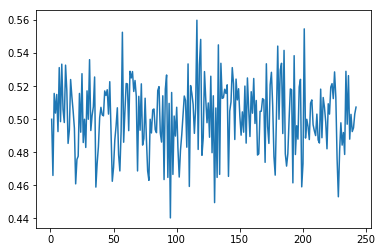

In [61]:
cartpole['acc'].plot()

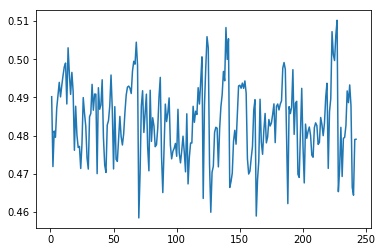

In [62]:
cartpole['loss'].plot()

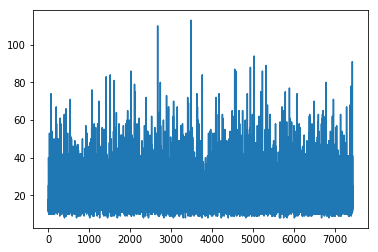

In [57]:
cartpole['episode_reward'].plot()